# 用五维梯度下降拟合函数sin(x)

In [898]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [899]:
x_values = np.linspace(0, 2 * np.pi, 1000)
#计算对应的sin(x)值
sin_values = np.sin(x_values)
#创建DataFrame
data = pd.DataFrame({
    'x': x_values,
    'sin(x)': sin_values
})
data.head(1000)

,x,sin(x)
0,0.000000,0.000000e+00
1,0.006289,6.289433e-03
2,0.012579,1.257862e-02
3,0.018868,1.886730e-02
4,0.025158,2.515525e-02
...,...,...
995,6.258027,-2.515525e-02
996,6.264317,-1.886730e-02
997,6.270606,-1.257862e-02
998,6.276896,-6.289433e-03


In [900]:
data_x = pd.DataFrame(data, columns=['x'])
data_y = pd.DataFrame(data, columns=['sin(x)'])

In [901]:
data_x_5 = pd.DataFrame({
    'x^1': data_x['x'],
    'x^2': data_x['x'] ** 2,
    'x^3': data_x['x'] ** 3,
    'x^4': data_x['x'] ** 4,
    'x^5': data_x['x'] ** 5
})
data_x_5.insert(0, "x^0", 1)
data_x_5.head()

,x^0,x^1,x^2,x^3,x^4,x^5
0,1,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,1,0.006289,0.000040,2.487959e-07,1.564795e-09,9.841740e-12
2,1,0.012579,0.000158,1.990367e-06,2.503672e-08,3.149357e-10
3,1,0.018868,0.000356,6.717488e-06,1.267484e-07,2.391543e-09
4,1,0.025158,0.000633,1.592293e-05,4.005876e-07,1.007794e-08


## 初始化theta,初始的theta全为sin(x)的泰勒展开式前几项系数

In [902]:
theta = np.matrix(np.array([0,1,0,-0.1666666,0,7.575757575757576e-4]))
theta

matrix([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         -1.66666600e-01,  0.00000000e+00,  7.57575758e-04]])

## 一个计算误差的函数

In [903]:
def computeCost(x, y, theta):
    inner = np.power(((x*theta.T)-y),2)
    return np.sum(inner)/(2*len(x))

In [904]:
computeCost(data_x_5.values,data_y.values,theta)

48.27896842951903

## 梯度下降

In [905]:
def gradientDescent(x, y, theta, alpha, iters):
    cost = np.zeros(iters)
    m = len(y)  # 样本数量
    for i in range(iters):
        #计算预测值
        predictions = x @ theta.T  # 矩阵乘法
        #计算误差
        error = predictions - y
        #计算梯度
        gradient = (alpha / m) * (error.T @ x)
        #更新 theta
        theta = theta - gradient
        #记录当前迭代的损失值
        cost[i] = computeCost(x, y, theta)
    return theta, cost

In [906]:
alpha = 0.0000001#学习率
iters = 1000000#次数
g,cost=gradientDescent(data_x_5.values,data_y.values,theta,alpha,iters)
g

matrix([[-0.00459479,  0.98903098, -0.02156552, -0.19024656,  0.03786693,
         -0.00171847]])

In [907]:
computeCost(data_x_5.values,data_y.values,g)

0.0054403826257063805

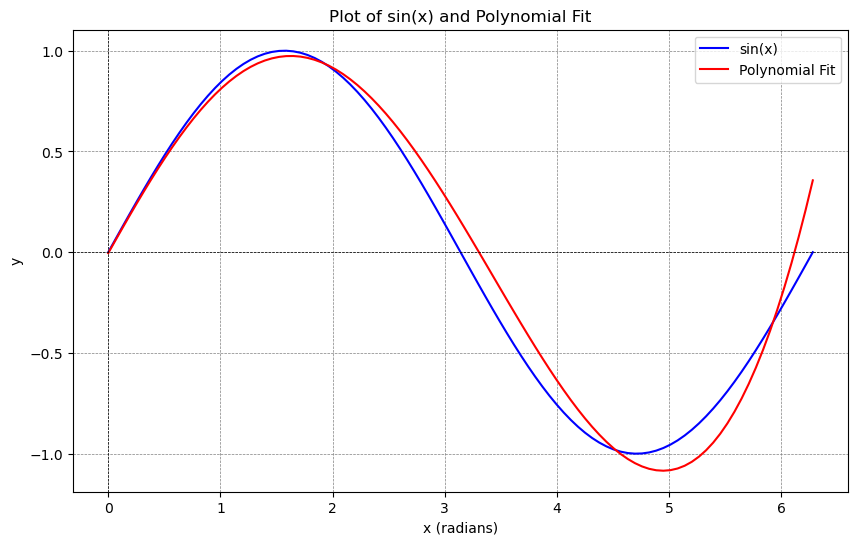

In [908]:
# 生成 x 值，从 0 到 2π
x = np.linspace(0, 2 * np.pi, 100)
# 计算对应的 sin(x) 值
y_sin = np.sin(x)
# 计算多项式的 y 值
y_poly = (g[0, 0] * 1 + g[0, 1] * x + g[0, 2] * x**2 +
          g[0, 3] * x**3 + g[0, 4] * x**4 + g[0, 5] * x**5)
# 创建图形
plt.figure(figsize=(10, 6))
# 绘制 sin(x) 曲线
plt.plot(x, y_sin, label='sin(x)', color='b')
# 绘制多项式曲线
plt.plot(x, y_poly, label='Polynomial Fit', color='r')
# 添加标题和标签
plt.title('Plot of sin(x) and Polynomial Fit')
plt.xlabel('x (radians)')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5, ls='--')  # x 轴
plt.axvline(0, color='black', linewidth=0.5, ls='--')  # y 轴
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
# 显示图形
plt.show()